## Linear regression with multiple variables: An example implementation in Python 3 with numpy and matplotlib.

The goal of [linear regression](https://en.wikipedia.org/wiki/Linear_regression) in the context of machine learning is to develop a model capable of predicting a continous output ($y$) given a set of input features ($X$). The training of this model involves determining a set of parameters (or weights) $\theta$ that linearly map the input features to the output of the model. Choosing these parameters is an optimization problem where we are looking for a minimum of a loss or [cost function](https://en.wikipedia.org/wiki/Loss_function) ($J(\theta)$) in the $\theta$ parameter space. The basic way to approach this problem numerically is to implement the batch [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) algorithm.

Below are the vectorized forms of the linear regression hypothesis $h_\theta(X)$, cost function $J(\theta)$, and the gradient descent algorithm. 

Linear Regression Hypothesis:

$h_\theta(X) = \theta^T X$

Cost function:

$J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T (X\theta - \vec{y})$

Batch gradient descent:

$\theta := \theta - \frac{\alpha}{m}X^T(X\theta - \vec{y})$

Where $X$ is the feature matrix containing $m$ examples, $\theta$ is a column vector of model parameters, $\vec{y}$ is the column vector of outputs, and $\alpha$ is the learning rate. We will use $n$ to denote the number of features.

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline
# Only necessary if you have a HiDPI display
%config InlineBackend.figure_format = 'retina'

First, we will define functions for each equation and algorithm.

In [2]:
def hypothesis(theta, X):
    """Function to calculate the linear regression hypothesis given the parameter column vector `theta` and
    an input feature column vector `X`. Both `theta` and `X` have the same shape of (`n` x 1)."""
    return theta.T * X

def calculate_cost(theta, X, y):
    """Function to calculate the cost function `J(theta)` given the parameter vector `theta`,
    the matrix `X` of examples and a column vector of their corresponding outputs `y`."""
    m = X.shape[0]
    J = (1.0 / (2.0 * m)) * (X * theta - y).T * (X * theta - y)
    return J

def gradient_descent(initial_theta, X, y, alpha=0.1, maxiter=100, tol=0.1, return_costs=False):
    m = X.shape[0]
    i = 0
    theta = initial_theta
    costs = []
    while i < maxiter:
        theta = theta - (alpha / m) * X.T * (X * theta - y)
        cost = calculate_cost(theta, X, y)
        costs.append(float(cost))
        if cost <= tol:
            if return_costs:
                return theta, costs
            else:
                return theta
        i = i + 1
    if return_costs:
        return theta, costs
    else:
        return theta

Next, we will define initial guess for $\theta$ (all zeros), $X$ (based on two features, called $x_1$ and $x_2$ here), and $y$.

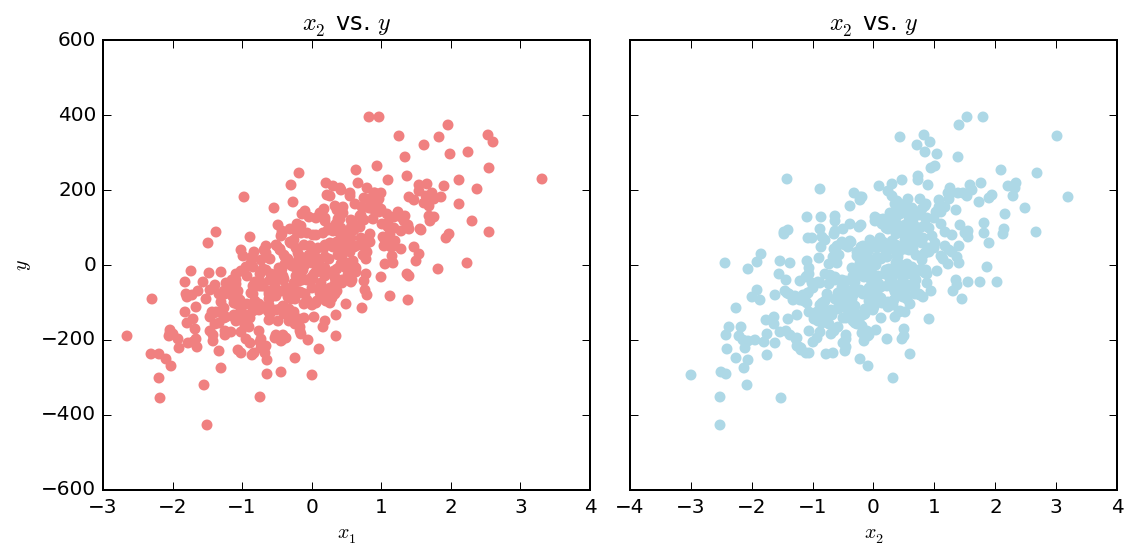

In [3]:
n_pts = 500

X, y = make_regression(n_samples=n_pts, n_features=3, n_informative=3, noise=5, random_state=2)
# Convert to matrices for ease of matrix multiplication later
X = np.matrix(X)
y = np.matrix(y).T

initial_theta = np.matrix([np.zeros(X.shape[1])]).T

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
ax[0].scatter(X[:,1], y, color='lightcoral')
ax[1].scatter(X[:,2], y, color='lightblue')
ax[0].set_ylabel('$y$')
ax[0].set_xlabel('$x_1$')
ax[1].set_xlabel('$x_2$')
ax[0].set_title('$x_2$ vs. $y$')
ax[1].set_title('$x_2$ vs. $y$')
fig.tight_layout()

Run the gradient descent algorithm using the initial guess of $\theta$ on $X$ with outputs $y$.

In [4]:
theta, costs = gradient_descent(initial_theta, X, y, alpha=0.01, tol=0.001, maxiter=200, return_costs=True)

This yields the final model parameters $\theta$ as well as the cost function $J(\theta)$ as a function of iteration number.

In [5]:
print(theta)

[[ 42.37497823]
 [ 82.95958097]
 [ 69.12775593]]


If our gradient descent algorithm is converging to a local minimum, we should see a monotonic decrease in the cost function $J(\theta)$ with each iteration.

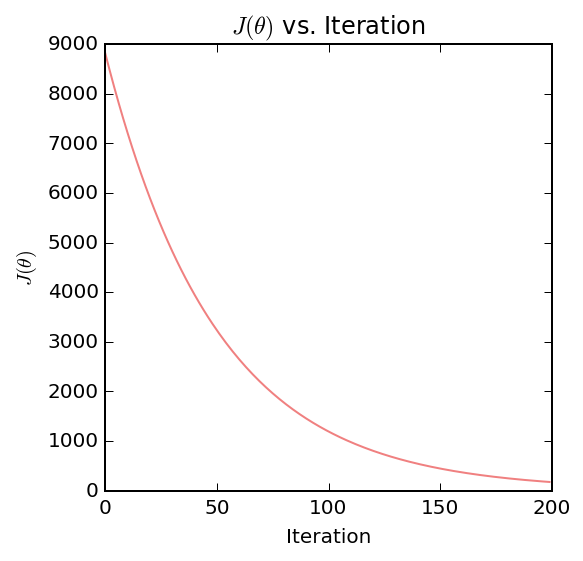

In [6]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(costs, color='lightcoral')
ax.set_xlabel('Iteration')
ax.set_ylabel(r'$J(\theta)$')
ax.set_title(r'$J(\theta)$ vs. Iteration');

We can compare the results from gradient descent with the optimal $\theta$ as calculated using the normal equation:

$\theta = (X^T X)^{-1} X^T y$

In [7]:
theta_from_norm = np.linalg.pinv(X.T * X) * X.T * y
print(theta_from_norm)

[[ 48.96368279]
 [ 96.88658186]
 [ 78.59024267]]


Now let's visualize the results using the theta we obtained from gradient descent. We'll plot the fit as a dotted black line.

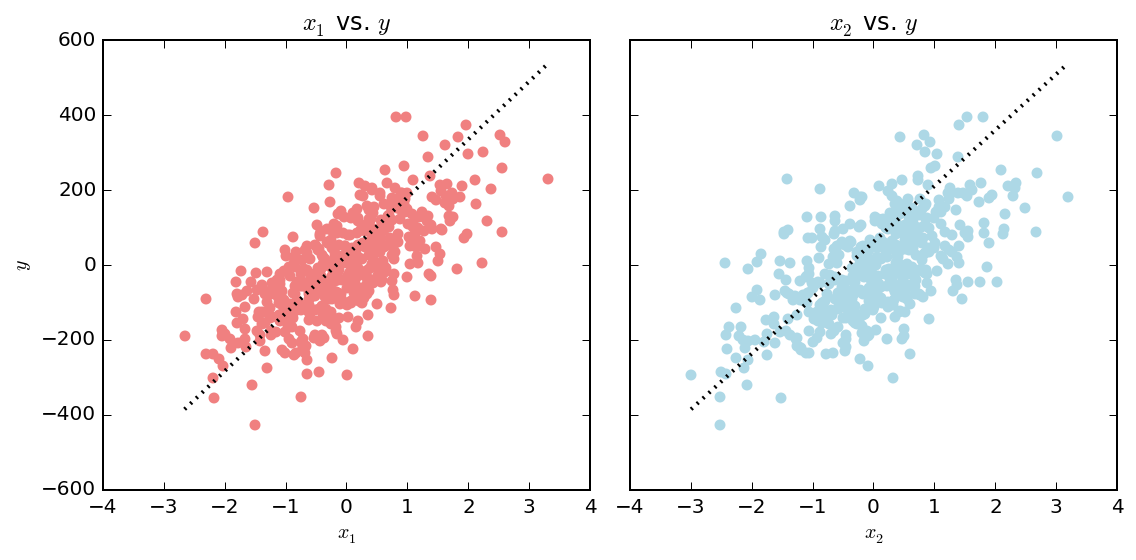

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)

x1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
x2 = np.linspace(X[:,2].min(), X[:,2].max(), 100)

ax[0].plot(x1, theta.item(0) + theta.item(1)*x1 + theta.item(2)*x2, color='k', lw=2, ls=':')
ax[0].scatter(X[:,1], y, color='lightcoral')
ax[0].set_title('$x_1$ vs. $y$')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$y$')

ax[1].plot(x2, theta.item(0) + theta.item(1)*x1 + theta.item(2)*x2, color='k', lw=2, ls=':')
ax[1].scatter(X[:,2], y, color='lightblue')
ax[1].set_title('$x_2$ vs. $y$')
ax[1].set_xlabel('$x_2$')

fig.tight_layout()

In the above plots we can see that the model parameters we found fit the data, but probably could be a bit better. You can see that the model (the dashed black line) underestimates our data with $x_1$ and overestimates with $x_2$. However, we know gradient descent is converging as the cost function $J(\theta)$ is decreasing with each iteration. We could probably get a better fit by either running our gradient descent algorithm for more iterations or increasing our learning rate $\alpha$. If we take one of these approaches, we might also want to decrease the tolerance as well.

Let's now generate the same plots except this time we'll add another fit using the values for $\theta$ that we obtained using the normal equation as a dashed black line.

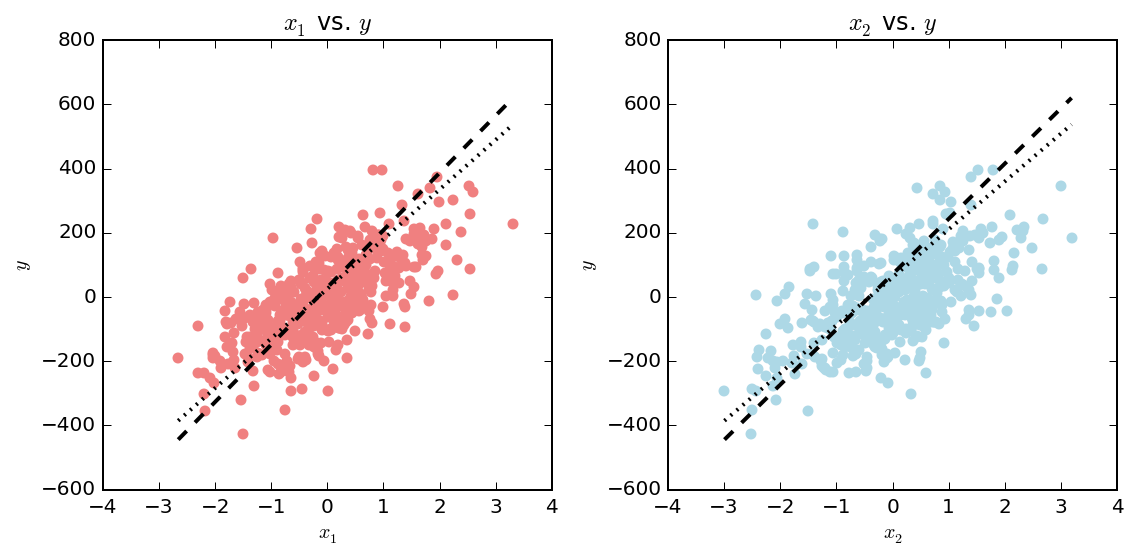

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

x1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
x2 = np.linspace(X[:,2].min(), X[:,2].max(), 100)

ax[0].plot(x1, theta.item(0) + theta.item(1)*x1 + theta.item(2)*x2, color='k', lw=2, ls=':')
ax[0].plot(x1, theta_from_norm.item(0) + theta_from_norm.item(1)*x1 + theta_from_norm.item(2)*x2, color='k', lw=2, ls='--')
ax[0].scatter(X[:,1], y, color='lightcoral')
ax[0].set_title('$x_1$ vs. $y$')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$y$')
#ax[0].set_ylim(0, 20)

ax[1].plot(x2, theta.item(0) + theta.item(1)*x1 + theta.item(2)*x2, color='k', lw=2, ls=':')
ax[1].plot(x2, theta_from_norm.item(0) + theta_from_norm.item(1)*x1 + theta_from_norm.item(2)*x2, color='k', lw=2, ls='--')
ax[1].scatter(X[:,2], y, color='lightblue')
ax[1].set_title('$x_2$ vs. $y$')
ax[1].set_xlabel('$x_2$')
ax[1].set_ylabel('$y$')
#ax[1].set_ylim(0, 20)

fig.tight_layout()

The model parameters obtained from the normal equation fit the data slightly better. However, the drawback to using the normal equation is that it becomes computationally expensive when the training data $X$ has a large amount of features or a large number of examples.